# **CIFAR-10 - Object Recognition in Images**


---




## **Objective:**

---


To identify CIFAR-10 - Object Recognition in Images.

## **Pre-Processing:**

---



**1. Import Kaggle to import the dataset.**

In [11]:
from google.colab import files
files.upload()
!pip install -q kaggle

Saving kaggle.json to kaggle.json


**2. Configure the path of the JSON file.**

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**3. Importing the Dog vs Cat Dataset from Kaggle**

In [13]:
!kaggle competitions download -c cifar-10

 96% 684M/715M [00:03<00:00, 206MB/s]
100% 715M/715M [00:03<00:00, 200MB/s]


In [14]:
!ls

cifar-10.zip  kaggle.json  sample_data


**4. Ectracting the files**

In [15]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [16]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


*Importing Py7zr to handle 7zip files*

In [17]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 32.8 MB/s eta 0:00:00


In [18]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall(path='train')
archive.close()

In [19]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


**5. Importing the Dependencies**

In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2
from google.colab.patches import cv2_imshow

In [21]:
filenames = os.listdir('/content/train')

In [22]:
len(filenames)

1

In [23]:
print(filenames[0:5])

['train']


In [24]:
print(filenames[-5:])

['train']


**6. Label Processing**

In [25]:
label_df = pd.read_csv("/content/trainLabels.csv")

In [26]:
label_df.shape

(50000, 2)

In [27]:
label_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [28]:
label_df[label_df["id"]==7600]

,id,label
7599,7600,airplane


In [29]:
label_df.value_counts("label")

,count
label,
airplane,5000
automobile,5000
bird,5000
cat,5000
deer,5000
dog,5000
frog,5000
horse,5000
ship,5000


In [30]:
label_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [31]:
labels_dictionary = {"airplane":0,"automobile":1,"bird":2,"cat":3,"deer":4,"dog":5,"frog":6,"horse":7,"ship":8,"truck":9}

labels = [labels_dictionary[i] for i in label_df["label"]]

In [32]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


In [33]:
id_list  = list(label_df["id"])
print(id_list[0:5])
print(id_list[-5:])


[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


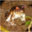

In [34]:
img = cv2.imread('/content/train/train/1.png')
cv2_imshow(img)

**7. Image Processing**

In [35]:
train_data_folder = "/content/train/train/"

data = []

for id in id_list:
  image = Image.open(train_data_folder+str(id)+".png")
  image = np.array(image)
  data.append(image)

In [36]:
type(data)

list

In [37]:
len(data)

50000

In [38]:
type(data[0])

numpy.ndarray

In [39]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
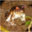

In [40]:
data[0]

**8. Converting Images and labels to Numpy Arrays**

In [41]:
X = np.array(data)
Y = np.array(labels)

In [42]:
type(X)
type(Y)

numpy.ndarray

In [43]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


## **Training and Testing**

---





**1. Splitting the Data**

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [45]:
print(X.shape,X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [46]:
print(Y.shape,Y_train.shape, Y_test.shape)

(50000,) (40000,) (10000,)


**2. Scaling Down the Data**

In [47]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [48]:
X_train_scaled[0]

array([[[0.13333333, 0.14117647, 0.16862745],
        [0.14509804, 0.14509804, 0.2       ],
        [0.17254902, 0.17254902, 0.25098039],
        ...,
        [0.24313725, 0.28627451, 0.36470588],
        [0.20392157, 0.24705882, 0.3254902 ],
        [0.17647059, 0.22352941, 0.30196078]],

       [[0.1372549 , 0.1372549 , 0.14509804],
        [0.13333333, 0.13333333, 0.15686275],
        [0.13333333, 0.12941176, 0.16862745],
        ...,
        [0.22745098, 0.27058824, 0.34901961],
        [0.19607843, 0.23529412, 0.31372549],
        [0.18431373, 0.22745098, 0.30588235]],

       [[0.13333333, 0.12941176, 0.1372549 ],
        [0.12941176, 0.1254902 , 0.14117647],
        [0.12941176, 0.1254902 , 0.14901961],
        ...,
        [0.25882353, 0.30196078, 0.38039216],
        [0.2       , 0.24313725, 0.32156863],
        [0.20784314, 0.25098039, 0.32941176]],

       ...,

       [[0.1254902 , 0.1254902 , 0.14901961],
        [0.1254902 , 0.12156863, 0.14509804],
        [0.12941176, 0

## **Building the Neural Networks**

---



In [49]:
import tensorflow as tf
from tensorflow import keras

In [50]:
num_of_classes = 10

**1. Setting up the layers of Neural Networks**

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**2. Compile the Neural Network**

In [52]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model.fit(X_train_scaled,Y_train,epochs=10,validation_split=0.1)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2151 - loss: 2.1100 - val_accuracy: 0.2892 - val_loss: 1.9214
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3080 - loss: 1.8856 - val_accuracy: 0.3180 - val_loss: 1.8932
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3167 - loss: 1.8643 - val_accuracy: 0.3325 - val_loss: 1.8488
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3267 - loss: 1.8565 - val_accuracy: 0.3095 - val_loss: 1.9072
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3347 - loss: 1.8359 - val_accuracy: 0.3280 - val_loss: 1.8557
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3372 - loss: 1.8211 - val_accuracy: 0.3435 - val_loss: 1.8259
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3484 - loss: 1.7993 - val_accuracy: 0.3395 - val_loss: 1.8057
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3492 - loss: 1.8000 - 

# **ResNet50**

---



In [54]:
from tensorflow.keras import models, layers
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [55]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [56]:
model = models.Sequential()
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation='softmax'))

In [57]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [58]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 429s 337ms/step - accuracy: 0.3342 - loss: 2.0148 - val_accuracy: 0.7525 - val_loss: 0.8894
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 418s 337ms/step - accuracy: 0.6725 - loss: 1.0617 - val_accuracy: 0.8878 - val_loss: 0.4608
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 373s 329ms/step - accuracy: 0.7993 - loss: 0.7552 - val_accuracy: 0.9172 - val_loss: 0.3489
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 337ms/step - accuracy: 0.8659 - loss: 0.5669 - val_accuracy: 0.9287 - val_loss: 0.2859
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 337ms/step - accuracy: 0.9080 - loss: 0.4401 - val_accuracy: 0.9340 - val_loss: 0.2483
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 373s 329ms/step - accuracy: 0.9369 - loss: 0.3444 - val_accuracy: 0.9367 - val_loss: 0.2381
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 337ms/step - accuracy: 0.9528 - loss: 0.2798 - val_accuracy: 0.9377 - val_loss: 0.2341
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 336ms/step - ac

In [59]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(f"Test Accuracy : {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 104ms/step - accuracy: 0.9434 - loss: 0.2076
Test Accuracy : 0.9398000240325928


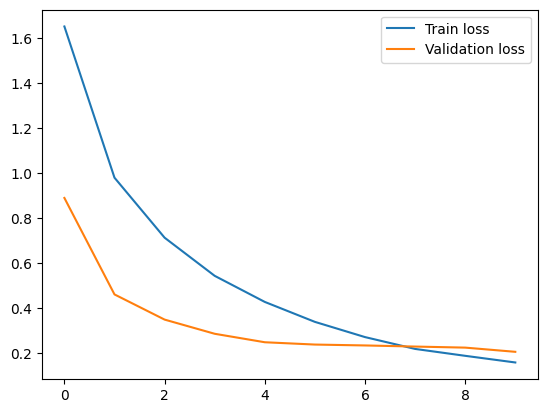

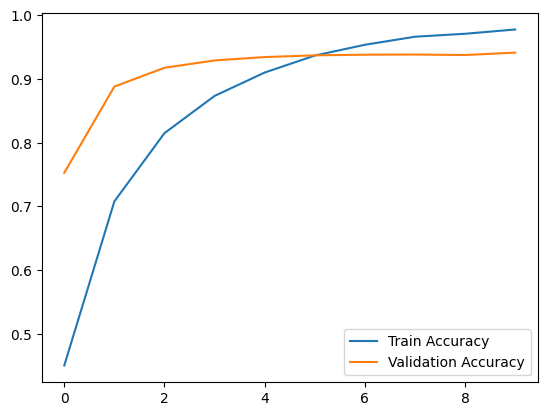

In [60]:
h = history

#Plot loss value
plt.plot(h.history['loss'],label='Train loss')
plt.plot(h.history['val_loss'],label='Validation loss')
plt.legend()
plt.show()

#Plot accuracy value
plt.plot(h.history['accuracy'],label='Train Accuracy')
plt.plot(h.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()